
# COS30049 - Assignment 2
### Session 26 Group 2
### Swinburne Univeristy of Technology

# 1.0 Data Collection

## 1.1 Verify the DataSet Can Be Read
Checks to verify:
- File exists
- Columns pesent
- No missing values

In [22]:
import pandas as pd
import os

In [15]:
file_path = "Constraint_English_Train.xlsx"

if os.path.exists(file_path):
    misinfo_data = pd.read_excel(file_path)
    print("Dataset loaded successfully!")
    print("Columns:", misinfo_data.columns.tolist())
    print(misinfo_data.head())
else:
    print("File not found:", file_path)

Dataset loaded successfully!
Columns: ['id', 'tweet', 'label']
   id                                              tweet label
0   1  The CDC currently reports 99031 deaths. In gen...  real
1   2  States reported 1121 deaths a small rise from ...  real
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4   5  Populous states can generate large case counts...  real


## 1.2 Test Retrieval of Data Matching "CDC"

In [ ]:
import pandas as pd
import re

file_path = "Constraint_English_Train.xlsx"
misinfo_data = pd.read_excel(file_path)

# Compile the regex pattern
pattern = re.compile(r'CDC', re.IGNORECASE)  # ignore case if needed

# Example: check in a specific column, e.g., 'text'
if 'text' in misinfo_data.columns:
    matches = misinfo_data['text'].apply(lambda x: bool(pattern.search(str(x))))
    print("Rows containing 'CDC':")
    print(misinfo_data[matches])
else:
    # If you want to search all columns
    matches = misinfo_data.applymap(lambda x: bool(pattern.search(str(x))))
    print("Rows containing 'CDC':")
    print(misinfo_data[matches.any(axis=1)])

Rows containing 'CDC':
        id                                              tweet label
0        1  The CDC currently reports 99031 deaths. In gen...  real
6        7  If you tested positive for #COVID19 and have n...  real
27      28  Just Appendix B gathering all the state orders...  real
33      34  CDC Recommends Mothers Stop Breastfeeding To B...  fake
138    139  Youth sports organizations: As you resume acti...  real
...    ...                                                ...   ...
6338  6339  ???The CDC can detain anyone with a fever ??" ...  fake
6345  6346  1645 deaths were reported today bringing the t...  real
6377  6378  Acc to @CDCgov &amp; @WHO there is currently n...  real
6391  6392  The CDC ???adjusted the US Covid deaths from 1...  fake
6405  6406  The cloth face coverings recommended to slow s...  real

[281 rows x 3 columns]


/var/folders/w0/r8xr9pyn4w19x3x9z5x82hm00000gn/T/ipykernel_96455/49314103.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matches = misinfo_data.applymap(lambda x: bool(pattern.search(str(x))))


## 1.3 Combine data sets
- Datasets have been cleaned in Google Refine

In [20]:
train_df = pd.read_excel("Constraint_English_Train_GR.xlsx")
val_df = pd.read_excel("Constraint_English_Val_GR.xlsx")
test_df = pd.read_excel("Constraint_English_Test_GR.xlsx")

/opt/anaconda3/envs/ctip/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/envs/ctip/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/envs/ctip/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# 2.0 Data preprocessing

We are using GR-tagged xlsx files instead of the original provided datasets. GR = Google Refine.

## 2.1 Emoji and Symbols Refining

### Test Emoji and Symbols Detection
- Keep symbols used in natural language

In [ ]:
import pandas as pd
import re

df = pd.DataFrame({
    'text': ["Hello world", "Hi there 😀", "@user_name is cool", "No emojis here!", "symbol �"]
})

pattern = re.compile(r'[^\w\s@.,!?#]', flags=re.UNICODE)
df['has_emoji'] = df['text'].apply(lambda x: bool(pattern.search(str(x))))

print(df)

                 text  has_emoji
0         Hello world      False
1          Hi there 😀       True
2  @user_name is cool      False
3     No emojis here!      False
4            symbol �       True


### Test emoji refining

In [24]:
import pandas as pd
import re

df = pd.DataFrame(train_df)

# Step 1: Clean text safely
def clean_text(text):
    text = str(text)
    
    # Step 1a: Protect @usernames and #hashtags
    placeholders = {}
    for match in re.findall(r'(@\w+|#\w+)', text):
        ph = f"PLACEHOLDER{len(placeholders)}"
        placeholders[ph] = match
        text = text.replace(match, ph)
    
    # Step 1b: Replace all underscores with spaces
    text = text.replace('_', ' ')
    
    # Step 1c: Remove emojis / unusual symbols
    # Keep letters, numbers, whitespace, @, #, ., ,, !, ?
    text = re.sub(r'[^\w\s@.,!?#]', '', text, flags=re.UNICODE)
    
    # Step 1d: Remove leading punctuation (like . , ! ?) at start of text
    text = re.sub(r'^[.,!?_\s]+', '', text)
    
    # Step 1e: Restore usernames and hashtags
    for ph, original in placeholders.items():
        text = text.replace(ph, original)
    
    return text

# Apply cleaning function to the 'tweet' column
df['clean_text'] = df['tweet'].apply(clean_text)

# Optional: preview result
print(df[['tweet', 'clean_text']])

# Save cleaned file
df.to_excel("Constraint_English_Train_Cleaned.xlsx", index=False)

                                                  tweet  \
0     The CDC currently reports 99031 deaths. In gen...   
1     States reported 1121 deaths a small rise from ...   
2     Politically Correct Woman (Almost) Uses Pandem...   
3     #IndiaFightsCorona: We have 1524 #COVID testin...   
4     Populous states can generate large case counts...   
...                                                 ...   
6415  A tiger tested positive for COVID-19 please st...   
6416  Autopsies prove that COVID-19 is a blood clot,...   
6417  _A post claims a COVID-19 vaccine has already ...   
6418  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund   
6419  It has been 93 days since the last case of COV...   

                                             clean_text  
0     The CDC currently reports 99031 deaths. In gen...  
1     States reported 1121 deaths a small rise from ...  
2     Politically Correct Woman Almost Uses Pandemic...  
3     #IndiaFightsCorona We have 1524 #COVID testing...  
4

### Clean emojis on all 3 datasets

- Normalized usernames and hashtags instead of keeping them.

In [ ]:
import pandas as pd
import re

# Step 1: Define cleaning function
def clean_text(text):
    text = str(text)
    
    # Step 1a: Normalize links, usernames and hashtags 
    # Normalize @usernames to <USER>
    text = re.sub(r'@\w+', '<USER>', text)

    # Normalize #hashtags to <HASHTAG:topic>
    def replace_hashtag(match):
        hashtag = match.group()[1:]  # remove #
        return f"<HASHTAG:{hashtag}>"
    
    text = re.sub(r'#\w+', replace_hashtag, text)
    
    # Normalize links
    text = re.sub(r'https?://\S+|www\.\S+', '<LINK>', text)
    
    # Step 1b: Replace all underscores 
    text = text.replace('_', '')
    
    # Step 1c: Remove emojis / unusual symbols
    # Keep letters, numbers, whitespace, @, #, ., ,, !, ?
    text = re.sub(r'[^\w\s@.,!?#<>:;]', '', text, flags=re.UNICODE)
    
    # Step 1d: Remove leading punctuation (like . , ! ?) at start of text
    text = re.sub(r'^[.,!?_\s]+', '', text)
    
    return text


# Step 2: Define helper function for cleaning datasets
def clean_dataset(input_path, output_path, text_column='tweet'):
    """
    Reads a dataset, cleans the specified text column, and saves cleaned dataset.
    """
    df = pd.read_excel(input_path)

    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in dataset.")

    df['clean_text'] = df[text_column].apply(clean_text)

    df.to_excel(output_path, index=False)
    print(f"Cleaned dataset saved to {output_path}")


# Step 3: Clean train, validation, and test datasets
datasets = [
    ("Constraint_English_Train_GR.xlsx", "Constraint_English_Train_Cleaned.xlsx"),
    ("Constraint_English_Val_GR.xlsx", "Constraint_English_Val_Cleaned.xlsx"),
    ("Constraint_English_Test_GR.xlsx", "Constraint_English_Test_Cleaned.xlsx")
]

for input_path, output_path in datasets:
    clean_dataset(input_path, output_path)

Cleaned dataset saved to Constraint_English_Train_Cleaned.xlsx
Cleaned dataset saved to Constraint_English_Val_Cleaned.xlsx
Cleaned dataset saved to Constraint_English_Test_Cleaned.xlsx


/opt/anaconda3/envs/ctip/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/envs/ctip/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## 2.2 Remove Stopwords
- use nltk library

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/zara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1.6 Lemmatization
- Lemmatization cleans word forms that has "-ing" so that words are in keyword forms.
- uses Spacy or NLTK
- choice: Spacy (more accurate and faster, but larger)
- it also tokenize words

In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.lemma_ != "-PRON-"])

## 2.3 Spelling Correction
- Tools available: TextBlob, SymSpell, Hunspell or pyspellchecker
- TextBlob - 36.4s (good for small datasets)
- Spellchecker - 36.6s

In [ ]:
from textblob import TextBlob

def correct_spelling(text):
    return str(TextBlob(text).correct())

In [ ]:
import nltk
nltk.download('punkt', download_dir="/Users/zara/nltk_data")
nltk.data.path.append("/Users/zara/miniconda3/envs/ctip")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zara/miniconda3/envs/ctip/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

- conda info --envs
- replace /Users..... to your own path

## 2.4 Improved final code
- added hashtag, link and user mention normalization, word lemetization (+ removed spaces due to lemetization), and spell checking.

Tools:
1. pandas - reading and writing excel datasets (pd.red_excel, df.to_excel)
2. re (regex) - Text normalization (usernames, hashtags, links) and symbol removal.
3. nltk - stopword removal 
4. spacy - lemmatization 
5. textblob - spelling correction
6. lambda + regex - placeholder integrity


Preprocessing steps taken:
- username to <USER>
- hashatags to <HASHTAG:topic>
- links to <LINK>
- removed underscores
- removed emojis/weird symbols 
- removed leading punctuations
- removed stopwords - split text intp tokens, filter stopwords and rejoin
- lemmatization - convert words to their root form (avoid pronouns)
- remove spaces in placeholders after lemmetization
- spelling correction 

Dataset Processing
- Reads each dataset (pd.read_excel)
- Applies cleaning to a specified column (tweet)
- Writes cleaned data to a new Excel file.
- Processes multiple datasets in a loop.


Observations: there are still some spaces in placeholders <> after lemmetization even when spaces are removed with regex.

In [89]:
import pandas as pd
import re
import nltk
import spacy
from textblob import TextBlob
#from spellchecker import SpellChecker

#spell = SpellChecker()

# Function - Lemmatize
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if token.lemma_ != "-PRON-"])

# Function - Remove spaces from lemmaitization
def remove_spaces_in_placeholders(text):
    return re.sub(r'<\s*(.*?)\s*>', lambda m: f"<{m.group(1).replace(' ', '')}>", text)

# Function - Spelling correction (TextBlob)
def correct_spelling(text):
    return str(TextBlob(text).correct())

# Function - Spelling correction (spellchecker)
# def correct_spelling(text):
#     return " ".join(spell.correction(word) or word for word in text.split())

# Function - Hashtag normalization function
def replace_hashtag(match):
    hashtag = match.group()[1:].lower()
    return f"<HASHTAG:{hashtag}>"

# Download stopwords once
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
negations = {"no", "not", "nor", "never"}
stop_words -= negations

# Cleaning function
def clean_text(text, do_lemmatize=True, do_spellcheck=False):
    text = str(text)

    # Normalize usernames, hashtags, and links
    text = re.sub(r'@\w+', '<USER>', text)
    text = re.sub(r'#\w+', replace_hashtag, text)
    text = re.sub(r'https?://\S+|www\.\S+', '<LINK>', text)

    # Remove underscores
    text = text.replace('_', '')

    # Remove emojis/unusual symbols but keep punctuation
    text = re.sub(r'[^\w\s@.,!?#<>:;]', '', text, flags=re.UNICODE)

    # Remove leading punctuation
    text = re.sub(r'^[.,!?_\s]+', '', text)

    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    text = " ".join(tokens)

    # Lemmatize and remove spaces 
    if do_lemmatize:
        text = lemmatize_text(text)
    text = remove_spaces_in_placeholders(text)

    # Spellcheck
    if do_spellcheck:
        text = correct_spelling(text)

    return text

# Dataset cleaning helper
def clean_dataset(input_path, output_path, text_column='tweet', do_lemmatize=True, do_spellcheck=False):
    df = pd.read_excel(input_path)

    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in dataset.")

    df['clean_text'] = df[text_column].apply(lambda x: clean_text(x, do_lemmatize, do_spellcheck))

    df.to_excel(output_path, index=False)
    print(f"Cleaned dataset saved to {output_path}")

# Run cleaning for datasets
datasets = [
    ("Constraint_English_Train_GR.xlsx", "Constraint_English_Train_Cleaned.xlsx"),
    ("Constraint_English_Val_GR.xlsx", "Constraint_English_Val_Cleaned.xlsx"),
    ("Constraint_English_Test_GR.xlsx", "Constraint_English_Test_Cleaned.xlsx")
]

for input_path, output_path in datasets:
    clean_dataset(input_path, output_path)

[nltk_data] Downloading package stopwords to /Users/zara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/envs/ctip/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cleaned dataset saved to Constraint_English_Train_Cleaned.xlsx


/opt/anaconda3/envs/ctip/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cleaned dataset saved to Constraint_English_Val_Cleaned.xlsx


/opt/anaconda3/envs/ctip/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cleaned dataset saved to Constraint_English_Test_Cleaned.xlsx


# 3.0 Machine Model Selection
- supervised ML (classifies real vs fake)
- feature extraction: Uses TF-IDF vectorization with:
  - Unigrams + bigrams 
  - vocabulary size limited to 5000 features
  - Frequency thresholds:
	- 	min_df=5 (ignore rare words).
	- 	max_df=0.9 (remove overly common words).
- model selection: 
  - Logic regression as primary classifier
    - Uses max_iter=1000 for convergence stability
  - KNN used for baseline comparison
    - less effective on sparse data
- Evaluation
  - metrics report:
    - accuracy
    - f1 score
    - Classification report (precision, recall, F1 per class)
    - Confusion matrix heatmap for error analysis.
  - Confusion matrix shows counts of correct and incorrect predictions for samples in test dataset. 

## Why this selection?
- TF-IDF + Logistic Regression is a well-established baseline for text classification and misinformation detection, balancing interpretability and performance.
- N-grams capture short contextual dependencies that are crucial in misinformation (e.g., “not true”, “fake news”).
- Feature limits & frequency cutoffs prevent overfitting on noise, slang, or rare hashtags.
- The inclusion of KNN shows experimentation with alternative models, but Logistic Regression is the practical choice.

Validation Results:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1020
           1       0.93      0.94      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Test Results:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.92      0.95      0.94        38

    accuracy                           0.90        51
   macro avg       0.88      0.86      0.87        51
weighted avg       0.90      0.90      0.90        51

KNN Validation Results:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1020
           1       0.95      0.82      0.88      1120

    accuracy                           0.88      2140
   macro avg       0.89      0.89      0.88      2140
weighted avg    

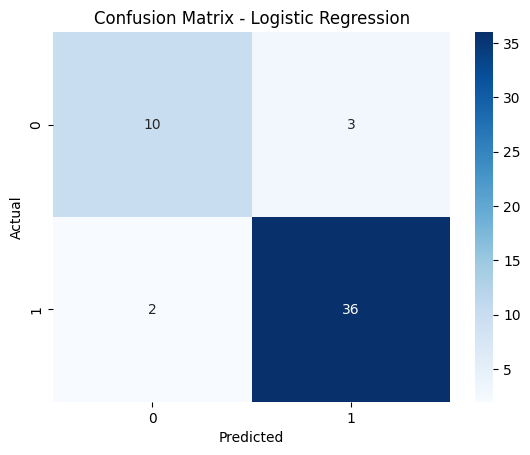

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Load prcoessed datasets
train_df = pd.read_excel("Constraint_English_Train_Cleaned.xlsx")
val_df = pd.read_excel("Constraint_English_Val_Cleaned.xlsx")
test_df = pd.read_excel("Constraint_English_Test_Cleaned.xlsx")

# Labels
y_train = train_df['label'].map({'real': 1, 'fake': 0})
y_val = val_df['label'].map({'real': 1, 'fake': 0})
y_test = test_df['label'].map({'real': 1, 'fake': 0})

# TF-IDF vectorization with improvements
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),      # Include unigrams and bigrams
    max_features=5000,       # Limit vocabulary size
    min_df=5,                # Minimum document frequency
    max_df=0.9,              # Remove very common words
)

# Fit vectorizer on training data
X_train_vec = vectorizer.fit_transform(train_df['clean_text'])
X_val_vec = vectorizer.transform(val_df['clean_text'])
X_test_vec = vectorizer.transform(test_df['clean_text'])

# Train Logistic Regression 
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_vec, y_train)

# Validate model 
y_val_pred = log_reg.predict(X_val_vec)
print("Validation Results:")
print(classification_report(y_val, y_val_pred))

# Test model 
y_test_pred = log_reg.predict(X_test_vec)
print("Test Results:")
print(classification_report(y_test, y_test_pred))

# # Comparison: KNN 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)

y_val_pred_knn = knn.predict(X_val_vec)
print("KNN Validation Results:")
print(classification_report(y_val, y_val_pred_knn))

y_test_pred_knn = knn.predict(X_test_vec)
print("KNN Test Results:")
print(classification_report(y_test, y_test_pred_knn))

# Test data
print("y_test length:", len(y_test))
print("X_test_vec shape:", X_test_vec.shape)
print("Predictions length:", len(y_test_pred))
print("First few y_test values:", y_test.head())
print("First few predictions:", y_test_pred[:10])
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Logistic Regression Test F1 Score:", f1_score(y_test, y_test_pred))

# Metrics and Confusion Matrix 
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



y-axis:
0 Actual Negative
1 Actual Postive

x-axis:
0 Predicted Negative
1 Predicated positive

0,0 - True Negative
0,1 - False Negative
0,1 - False Positve
1,1 - True Postive

- 10 Samples were actually fake, and correctly predicted as fake
- 36 Samples were acutally true, and correctly predicted as true 

# Extras: Tests and Comparisons

### Tests

In [14]:
# Get all features (unigrams + bigrams)
feature_names = vectorizer.get_feature_names_out()

# Filter only bigrams (words with a space)
bigrams = [word for word in feature_names if " " in word]

print(f"Number of bigrams: {len(bigrams)}")
print("Example bigrams:", bigrams[:20])

bigram_vectorizer = TfidfVectorizer(
    ngram_range=(2, 2),   # Only bigrams
    max_features=5000,
    min_df=5,
    max_df=0.9
)


Number of bigrams: 2042
Example bigrams: ['00 confirmed', '00 pm', '000 people', '04 2020', '08 00', '09 30', '10 000', '10 day', '10 lakh', '10 million', '10 pm', '10 second', '10 statesuts', '100 people', '1000 death', '1000 link', '10000 case', '1000190000 confirm', '11 00', '11 lakh']


### Vectorizer that only uses bigrams

In [15]:
bigram_vectorizer = TfidfVectorizer(
    ngram_range=(2, 2),   # Only bigrams
    max_features=5000,
    min_df=5,
    max_df=0.9
)

X_train_bigram = bigram_vectorizer.fit_transform(train_df['clean_text'])
X_val_bigram = bigram_vectorizer.transform(val_df['clean_text'])
X_test_bigram = bigram_vectorizer.transform(test_df['clean_text'])

log_reg_bigram = LogisticRegression(max_iter=1000, random_state=42)
log_reg_bigram.fit(X_train_bigram, y_train)

y_val_pred_bigram = log_reg_bigram.predict(X_val_bigram)
y_test_pred_bigram = log_reg_bigram.predict(X_test_bigram)

print("Validation Results (Bigrams Only):")
print(classification_report(y_val, y_val_pred_bigram))

print("Test Results (Bigrams Only):")
print(classification_report(y_test, y_test_pred_bigram))

print("Bigram Test Accuracy:", accuracy_score(y_test, y_test_pred_bigram))
print("Bigram Test F1 Score:", f1_score(y_test, y_test_pred_bigram))

Validation Results (Bigrams Only):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1020
           1       0.91      0.88      0.90      1120

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140

Test Results (Bigrams Only):
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.97      0.87      0.92        38

    accuracy                           0.88        51
   macro avg       0.84      0.90      0.86        51
weighted avg       0.90      0.88      0.89        51

Bigram Test Accuracy: 0.8823529411764706
Bigram Test F1 Score: 0.9166666666666666


### Most influential bigrams
- uses logistic regression coeffiecients mapped back to features

In [17]:
import numpy as np

coef = log_reg.coef_[0]
feature_names = vectorizer.get_feature_names_out()

# Create dataframe
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coef
})

# Filter bigrams
bigram_coef_df = coef_df[coef_df['feature'].str.contains(" ")]

# Sort by absolute coefficient value
bigram_coef_df = bigram_coef_df.reindex(bigram_coef_df.coef.abs().sort_values(ascending=False).index)

print("Top influential bigrams:")
print(bigram_coef_df.head(20))

Top influential bigrams:
                        feature      coef
1860            hashtag covid19  7.360339
2432               link hashtag -3.221148
953         coronavirus hashtag -3.172796
3604                    rt user  2.639841
1885  hashtag indiafightscorona  2.365095
4408               user hashtag  2.026406
1061            covid19 hashtag -1.881090
652                case hashtag  1.746163
1852    hashtag coronavirusfact -1.683887
1964                  here link  1.639278
1859              hashtag covid  1.576866
2733            new coronavirus -1.513123
1020                   covid 19 -1.357053
2663                  more link  1.327422
3892               state report  1.288036
943            coronavirus case -1.281925
3858             spread hashtag  1.271841
974        coronavirusfact link -1.252866
4244               total number  1.246529
2513           manage isolation  1.244630


## Comparison

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd
import numpy as np

def test_ngram_ranges_with_bigrams(train_texts, val_texts, test_texts, y_train, y_val, y_test,
                                     max_features=5000, min_df=5, max_df=0.9,
                                     top_n_bigrams=20):
    results = []

    for ngram_range in [(1, 1), (2, 2), (1, 2)]:
        print(f"\n=== Testing ngram_range={ngram_range} ===")

        vectorizer = TfidfVectorizer(
            ngram_range=ngram_range,
            max_features=max_features,
            min_df=min_df,
            max_df=max_df
        )

        X_train_vec = vectorizer.fit_transform(train_texts)
        X_val_vec = vectorizer.transform(val_texts)
        X_test_vec = vectorizer.transform(test_texts)

        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_vec, y_train)

        y_val_pred = model.predict(X_val_vec)
        y_test_pred = model.predict(X_test_vec)

        val_acc = accuracy_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred)

        test_acc = accuracy_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)

        print("Validation Results:")
        print(classification_report(y_val, y_val_pred))
        print("Test Results:")
        print(classification_report(y_test, y_test_pred))

        results.append({
            "ngram_range": ngram_range,
            "val_accuracy": val_acc,
            "val_f1": val_f1,
            "test_accuracy": test_acc,
            "test_f1": test_f1
        })

        # If bigrams are included, show top bigrams
        if ngram_range[1] >= 2:
            feature_names = vectorizer.get_feature_names_out()
            coef = model.coef_[0]

            bigram_features = [
                (feature, coef[i])
                for i, feature in enumerate(feature_names) if " " in feature
            ]

            bigram_features_sorted = sorted(bigram_features, key=lambda x: abs(x[1]), reverse=True)
            print(f"\nTop {top_n_bigrams} bigrams for ngram_range={ngram_range}:")
            for feature, weight in bigram_features_sorted[:top_n_bigrams]:
                print(f"{feature}: {weight:.4f}")

    return pd.DataFrame(results)

# Usage:
comparison_df = test_ngram_ranges_with_bigrams(
    train_df['clean_text'],
    val_df['clean_text'],
    test_df['clean_text'],
    y_train, y_val, y_test
)

print("\n=== Ngram Range Performance Comparison ===")
print(comparison_df)


=== Testing ngram_range=(1, 1) ===
Validation Results:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1020
           1       0.91      0.92      0.92      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.91      0.91      0.91      2140

Test Results:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.92      0.95      0.94        38

    accuracy                           0.90        51
   macro avg       0.88      0.86      0.87        51
weighted avg       0.90      0.90      0.90        51


=== Testing ngram_range=(2, 2) ===
Validation Results:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1020
           1       0.91      0.88      0.90      1120

    accuracy                           0.89      2140
  

### Notes:
- (1,1) Unigrams
- (2,2) Bigrams
- (1,2) Unigrams + Bigrams